In [9]:
import os 
import sys
from os.path import join as opj
import shutil
from glob import glob
def create_original_dataset_subject(dataset_template, dataset_config, contrasts=['cue', 'lf', 'lh', 'rf', 'rh', 't'], 
                            rm_existing=False):
    '''
    Performs original dataset creation (make directory, copy and rename files, creates txt file containing IDs)
    Works for SPM and FSL datasets obtained with hcp_pipelines scripts. 
    
    
    Parameters:
        - dataset_template: str, template for glob function (e.g. path to be able to find all data of the dataset)
        - dataset_config: dict, dictionnary with 3 keys (SOFT, FWHM and MC_PARAM) and values corresponding 
                                to the attributes of the dataset
    '''
    # Dataset name for directory
    dataset_name = 'DATASET_'+'_'.join([str(i)+'_'+str(y) for i,y in dataset_config.items()])
    
    # Create directories or remove them if already exists
    if not os.path.exists(f'../data/derived/{dataset_name}'):
        print('Creating dataset...')
        os.mkdir(f'../data/derived/{dataset_name}')
        os.mkdir(f'../data/derived/{dataset_name}/original')
    else:
        if rm_existing:
            print('Removing existing directory...')
            shutil.rmtree(f'../data/derived/{dataset_name}')
            os.mkdir(f'../data/derived/{dataset_name}')
            os.mkdir(f'../data/derived/{dataset_name}/original')
        else: 
            print('Dataset already exist.')
            sys.exit()
    
    # Find all files of the dataset, rename them and copy them in the correct directory
    id_list=[]
    for file in sorted(glob(dataset_template)):
        if dataset_config['SOFT']=='SPM':
            new_id = 'sub_' + file.split('/')[-2].split('_')[-3] + '_contrast_' + file.split('/')[-2].split('_')[2] #contrasts[int(file[-5])-1]
            print('Copying file:', new_id)
            new_file = f'../data/derived/{dataset_name}/original/{new_id}.nii'
        elif dataset_config['SOFT']=='FSL':
            new_id = 'sub_' + file.split('/')[-3].split('_')[-3] + '_contrast_' + contrasts[int(file.split('/')[-1][5])-1]
            #new_id = 'sub_' + file.split('/')[-3].split('_')[-3] + '_contrast_' + file.split('/')[-3].split('_')[2]
            print('Copying file:', new_id)
            new_file = f'../data/derived/{dataset_name}/original/{new_id}.nii.gz'
        id_list.append(new_id)
        shutil.copyfile(file, new_file)
    
    # Write ids in a txt file that will be used for creating a Dataset object
    with open(opj(f'../data/derived/{dataset_name}/{dataset_name}_IDS.txt'), "w") as file:
        for ids in id_list:
            file.write(str(ids))
            file.write('\n')
    file.close()

In [10]:
from os.path import join as opj
import os 
import sys
from os.path import join as opj
import shutil
from glob import glob
def create_original_dataset_group(dataset_template, dataset_config, contrasts=['cue', 'lf', 'lh', 'rf', 'rh', 't'], 
                            rm_existing=False):
    '''
    Performs original dataset creation (make directory, copy and rename files, creates txt file containing IDs)
    Works for SPM and FSL datasets obtained with hcp_pipelines scripts. 
    
    
    Parameters:
        - dataset_template: str, template for glob function (e.g. path to be able to find all data of the dataset)
        - dataset_config: dict, dictionnary with 3 keys (SOFT, FWHM and MC_PARAM) and values corresponding 
                                to the attributes of the dataset
    '''
    # Dataset name for directory
    dataset_name = 'DATASET_'+'_'.join([str(i)+'_'+str(y) for i,y in dataset_config.items()])
    
    # Create directories or remove them if already exists
    if not os.path.exists(f'/Volumes/Expansion/hcp_pipelines/data/derived/group_level/group_100/{dataset_name}/original'):
        print('Creating dataset...')
        #os.mkdir(f'/Volumes/Expansion/hcp_pipelines/data/derived/group_level/group_400/{dataset_name}')
        os.mkdir(f'/Volumes/Expansion/hcp_pipelines/data/derived/group_level/group_100/{dataset_name}/original')
    else:
        if rm_existing:
            print('Removing existing directory...')
            shutil.rmtree(f'../data/derived/group_level/{dataset_name}')
            os.mkdir(f'../data/derived/group_level/{dataset_name}')
            os.mkdir(f'../data/derived/group_level/{dataset_name}/original')
            
    id_list= []
    
    # Find all files of the dataset, rename them and copy them in the correct directory
    for n, file in enumerate(sorted(glob(opj(dataset_template, 'group_maps', 'l2_analysis_n_100', 
                                '_contrast_*', '_i_*', 'spmT_0001.nii')))):
        new_id = 'n_'+ {n} +'_contrast_' + file.split('/')[-3].split('_')[-1] 
        print('Copying file:', new_id)
        new_file = f'/Volumes/Expansion/hcp_pipelines/data/derived/group_level/group_100/{dataset_name}/original/{new_id}.nii'
        id_list.append(new_id)
        shutil.copyfile(file, new_file)
    
    # Write ids in a txt file that will be used for creating a Dataset object
    with open(opj(f'/Volumes/Expansion/hcp_pipelines/data/derived/group_level/group_100/{dataset_name}/{dataset_name}_IDS.txt'), "w") as file:
        for ids in id_list:
            file.write(str(ids))
            file.write('\n')
    file.close()

In [13]:
from lib import correlation_matrices
import random
subject_list = ["100206","100307","100408","100610","101006","101107","101309","101410","101915","102008","102109",
                "102311","102513","102614","102715","102816","103010","103111","103212","103414","103515","103818",
                "104012","104416","104820","105014","105115","105216","105620","105923","106016","106319","106521",
                "106824","107018","107220","107321","107422","107725","108020","108121","108222","108323","108525",
                "108828","109123","109325","109830","110007","110411","110613","111009","111211","111312","111413",
                "111514","111716","112112","112314","112516","112819","112920","113215","113316","113417","113619",
                "113821","113922","114116","114217","114318","114419","114621","114823","114924","115017","115219",
                "115320","115724","115825","116221","116423","116524","116726","117021","117122","117324","117728",
                "117930","118023","118124","118225","118528","118730","118831","118932","119025","119126","119732",
                "119833","120010","120111","120212","120414","120515","120717","121315","121416","121618","121719",
                "121820","121921","122317","122418","122620","122822","123117","123420","123723","123824","123925",
                "124220","124422","124624","124826","125222","125424","125525","126325","126426","126628","127226",
                "127327","127630","127731","127832","127933","128026","128127","128329","128935","129028","129129",
                "129331","129634","129937","130013","130114","130316","130417","130518","130619","130720","130821",
                "130922","131419","131722","131823","131924","132017","132118","133019","133625","133827","133928",
                "134021","134223","134324","134425","134627","134728","134829","135124","135225","135528","135629",
                "135730","135932","136126","136227","136631","136732","136833","137027","137128","137229","137431",
                "137532","137633","137936","138130","138231","138332","138534","138837","139233","139435","139637",
                "139839","140117","140319","140824","140925","141119","141422","141826","142424","142828","143224","143325","143426","143830","144125","144226","144428","144731","144832","144933","145127","145531","145632","145834","146129","146331","146432","146533","146735","146836","146937","147030","147636","147737","148032","148133","148335","148436","148840","148941","149236","149337","149539","149741","149842","150019","150423","150524","150625","150726","150928","151021","151223","151324","151425","151526","151627","151728","151829","151930","152225","152427","152831","153025","153126","153227","153429","153631","153732","153833","153934","154229","154330","154431","154532","154734","154835","154936","155231","155635","155938","156031","156233","156334","156435","156536","156637","157336","157437","157942","158035","158136","158338","158540","158843","159138","159239","159340","159441","159744","159845","159946","160123","160729","160830","160931","161327","161630","161731","161832","162026","162228","162329","162733","162935","163129","163331","163432","163836","164030","164131","164636","164939","165032","165234","165436","165638","165840","165941","166438","166640","167036","167238","167440","167743","168139","168240","168341","168745","168947","169040","169141","169343","169444","169545","169747","169949","170631","170934","171128","171330","171431","171532","171633","171734","172029","172130","172332","172433","172534","172635","172938","173132","173233","173334","173435","173536","173637","173738","173839","173940","174437","174841","175035","175136","175237","175338","175439","175540","175742","176037","176239","176441","176542","176744","176845","177140","177241","177342","177645","177746","178142","178243","178647","178748","178849","178950","179245","179346","179548","179952","180129","180230","180432","180533","180735","180836","180937","181131","181232","181636","182032","182436","182739","182840","183034","183337","183741","185038","185139","185341","185442","185846","185947","186040","186141","186444","186545","186848","186949","187143","187345","187547","187850","188145","188347","188448","188549","188751","189349","189450","189652","190031","191033","191235","191336","191437","191841","191942","192035","192136","192237","192439","192540","192641","192843","193239","193441","193845","194140","194443","194645","194746","194847","195041","195445","195647","195849","195950","196144","196346","196750","196851","196952","197348","197550","198047","198249","198350","198451","198653","198855","199150","199251","199352","199453","199655","199958"]
data_dir = '/Users/egermani/Documents/hcp_pipelines/data/derived/subject_level'

random_subs=random.sample(subject_list,3)

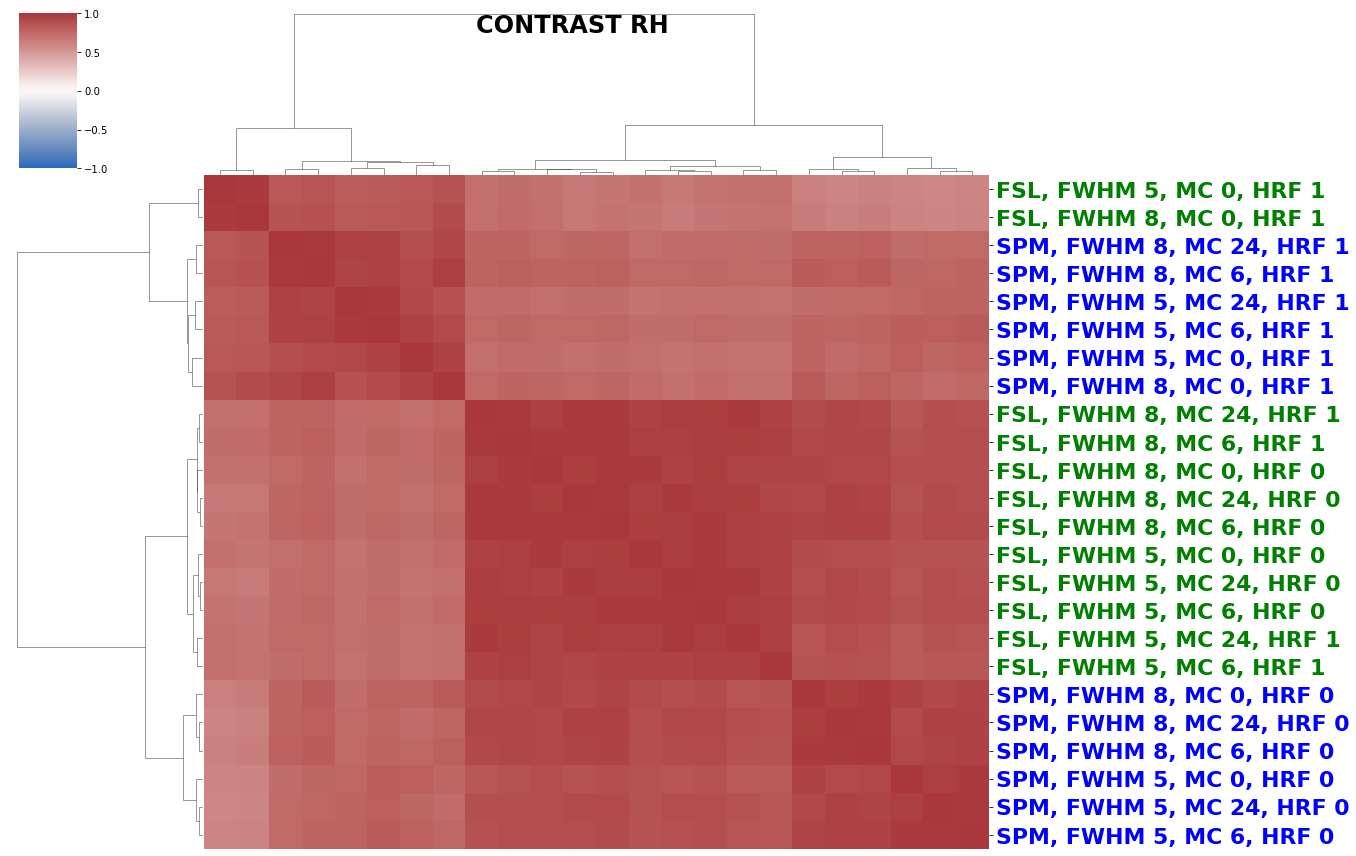

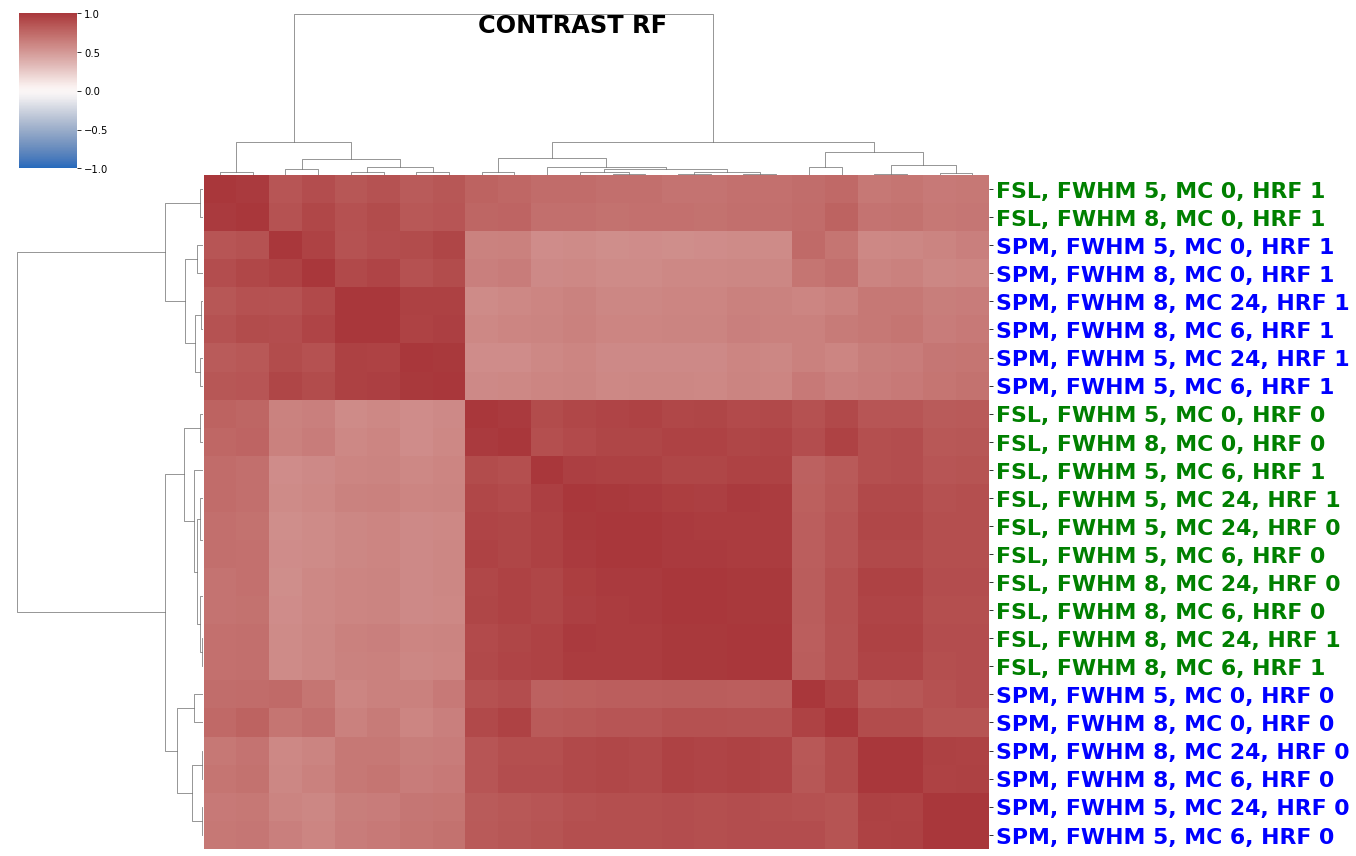

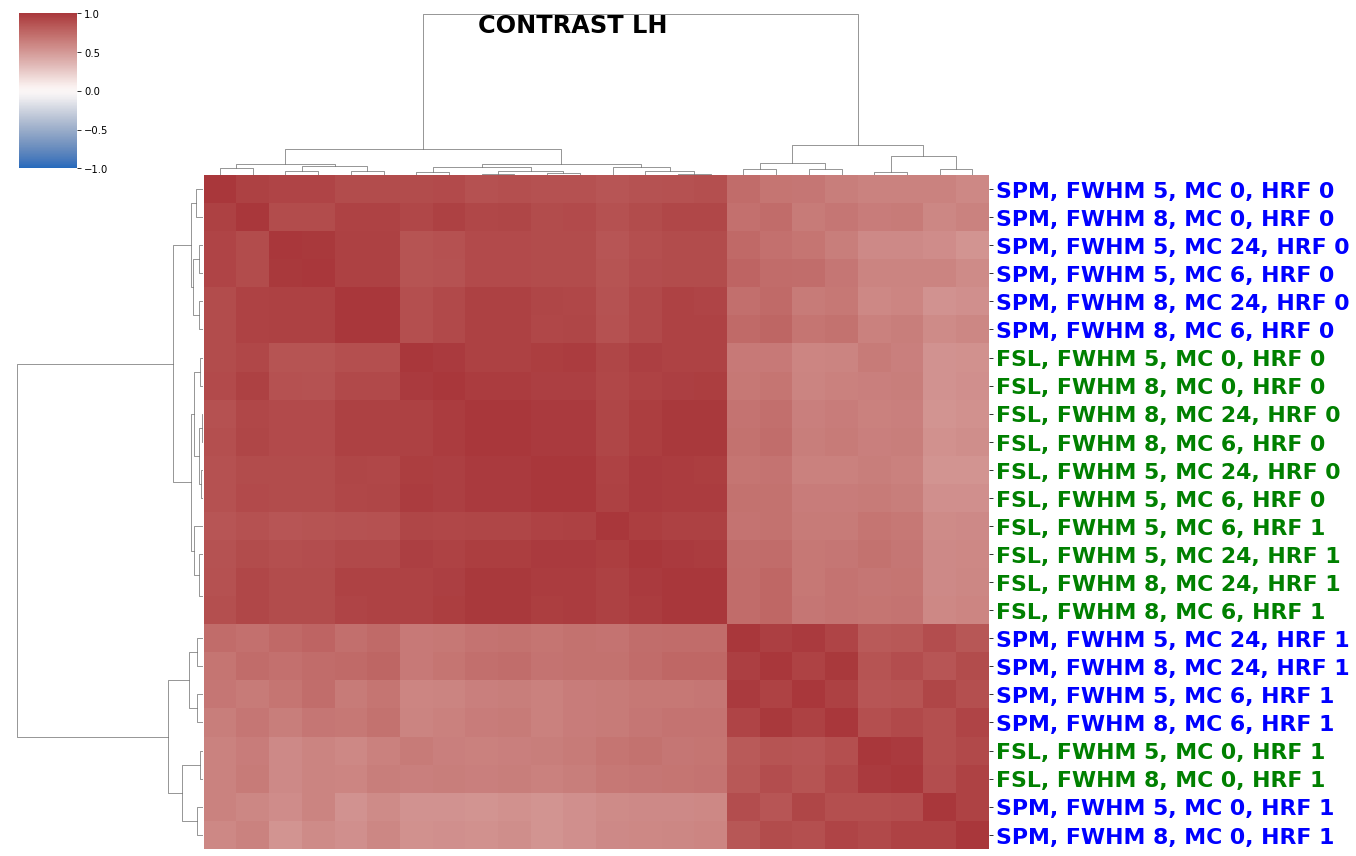

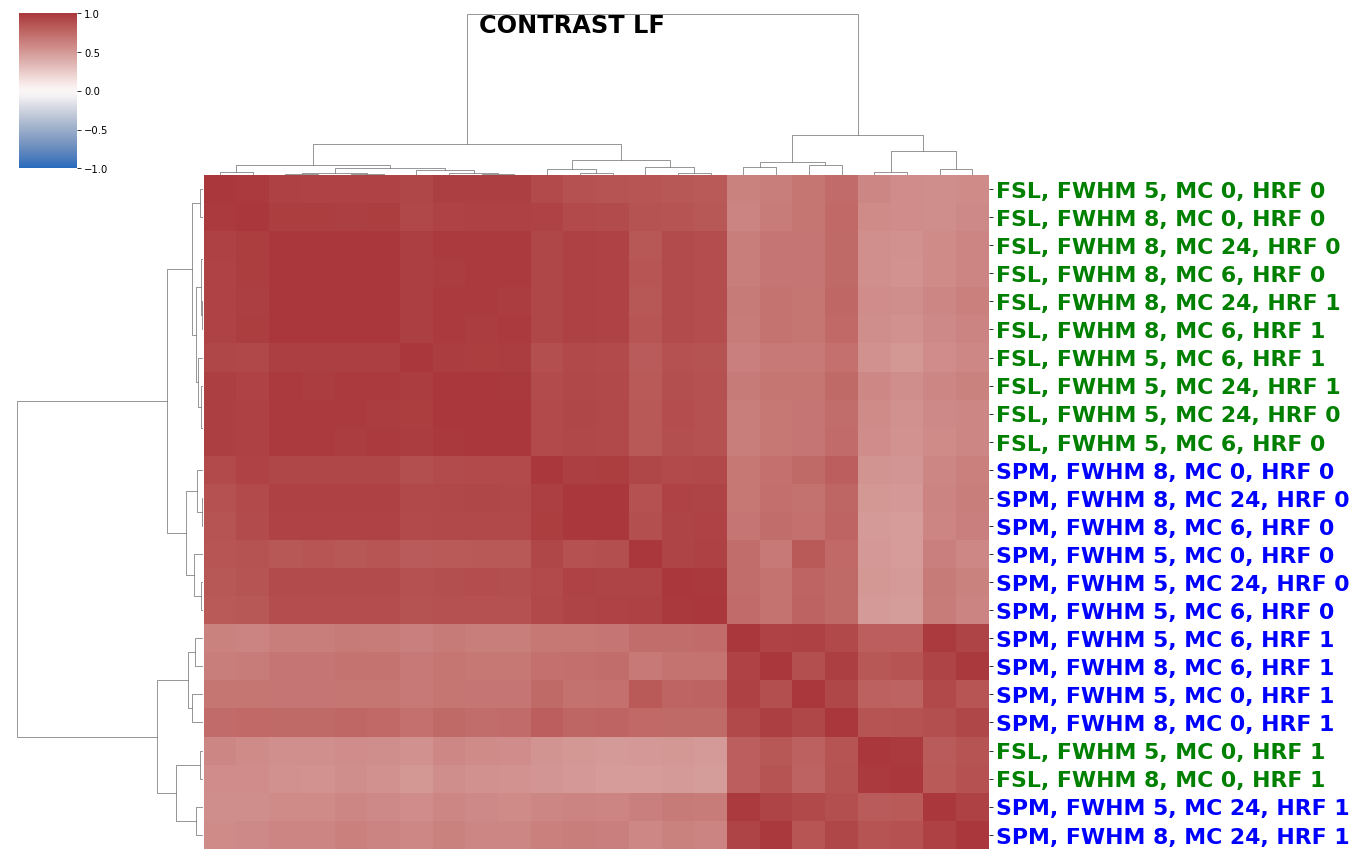

In [23]:
from lib import correlation_matrices
import importlib
importlib.reload(correlation_matrices)

data_dir = '/Volumes/Expansion/hcp_pipelines/data/derived/group_level/group_400'
for con in ['rh', 'rf', 'lh', 'lf']:
    correlation_matrices.plot_hierarchical_clustering_group([con], data_dir)

In [7]:
import matplotlib.pyplot as plt
from nilearn import plotting
from glob import glob 
import os
from math import * 
import matplotlib
from nilearn.datasets import load_mni152_template
from nilearn.image import resample_to_img, binarize_img, resample_img
from nilearn.masking import intersect_masks, apply_mask, compute_background_mask
import nibabel as nib
import numpy as np
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps
from os.path import join as opj
def resample(img, resolution=2):
    template = load_mni152_template(resolution=resolution)
    res_img = resample_to_img(img, template)

    return res_img

def get_intersection_mask(images_list):
    nii_img_list = []
    for img in images_list:
        nii_img_list.append(binarize_img(img, threshold=1e-6))

    mask = intersect_masks(nii_img_list, threshold=1)

    return mask

def visualise_subject_maps(subject, contrast, data_dir):
    
    p_global = glob(data_dir)
    maps = [img for img in sorted(p_global) if os.path.basename(img).split('_')[1] in subject and os.path.basename(img).split('_')[3].split('.')[0] in contrast]
    pipelines = [img.split('/')[-3].split('_')[2]+','+img.split('/')[-3].split('_')[4]+','+img.split('/')[-3].split('_')[7] +',' + img.split('/')[-3].split('_')[9] for img in sorted(maps)]
    
    f = plt.figure(figsize = (7 * 6, 7 * 4))
    gs = f.add_gridspec(4, 6)
    
    image_list = []
    for i,file in enumerate(sorted(maps)):
        img = nib.load(file)
        res_img = resample(img)
        image_list.append(res_img)

    mask = get_intersection_mask(image_list)
    
    for i, img in enumerate(image_list):
        img_data = img.get_fdata() * mask.get_fdata()
        img_masked = nib.Nifti1Image(img_data, img.affine)
        ax = f.add_subplot(gs[floor(i/6), i - 6 * floor(i/6)])
        
        disp = plotting.plot_glass_brain(img_masked, figure=f, axes=ax, 
                               display_mode = 'z', colorbar = False, annotate=False, 
                                         cmap=nilearn_cmaps['cold_hot'], plot_abs=False)
        disp.title(pipelines[i], size=28)
        
    plt.show()
    f.savefig(f'../figures/sub_{subject}_contrast_{contrast}.png')
    
def visualise_group_maps(contrast, data_dir):
    
    p_global = glob(opj(data_dir, '*.nii'))
    maps = [img for img in sorted(p_global) if os.path.basename(img).split('_')[1].split('.')[0] in contrast]
    pipelines = [img.split('/')[-3].split('_')[2]+','+img.split('/')[-3].split('_')[4]+','+img.split('/')[-3].split('_')[7] +',' + img.split('/')[-3].split('_')[9] for img in sorted(maps)]
    
    f = plt.figure(figsize = (7 * 6, 7 * 4))
    gs = f.add_gridspec(4, 6)
    
    image_list = []
    for i,file in enumerate(sorted(maps)):
        img = nib.load(file)
        res_img = resample(img)
        image_list.append(res_img)

    mask = get_intersection_mask(image_list)
    
    for i, img in enumerate(image_list):
        img_data = img.get_fdata() * mask.get_fdata()
        img_masked = nib.Nifti1Image(img_data, img.affine)
        ax = f.add_subplot(gs[floor(i/6), i - 6 * floor(i/6)])
        
        disp = plotting.plot_glass_brain(img_masked, figure=f, axes=ax, 
                               display_mode = 'z', colorbar = False, annotate=False, 
                                         cmap=nilearn_cmaps['cold_hot'], plot_abs=False)
        disp.title(pipelines[i], size=28)
        
    plt.show()
    f.savefig(f'../figures/groups_contrast_{contrast}.png')


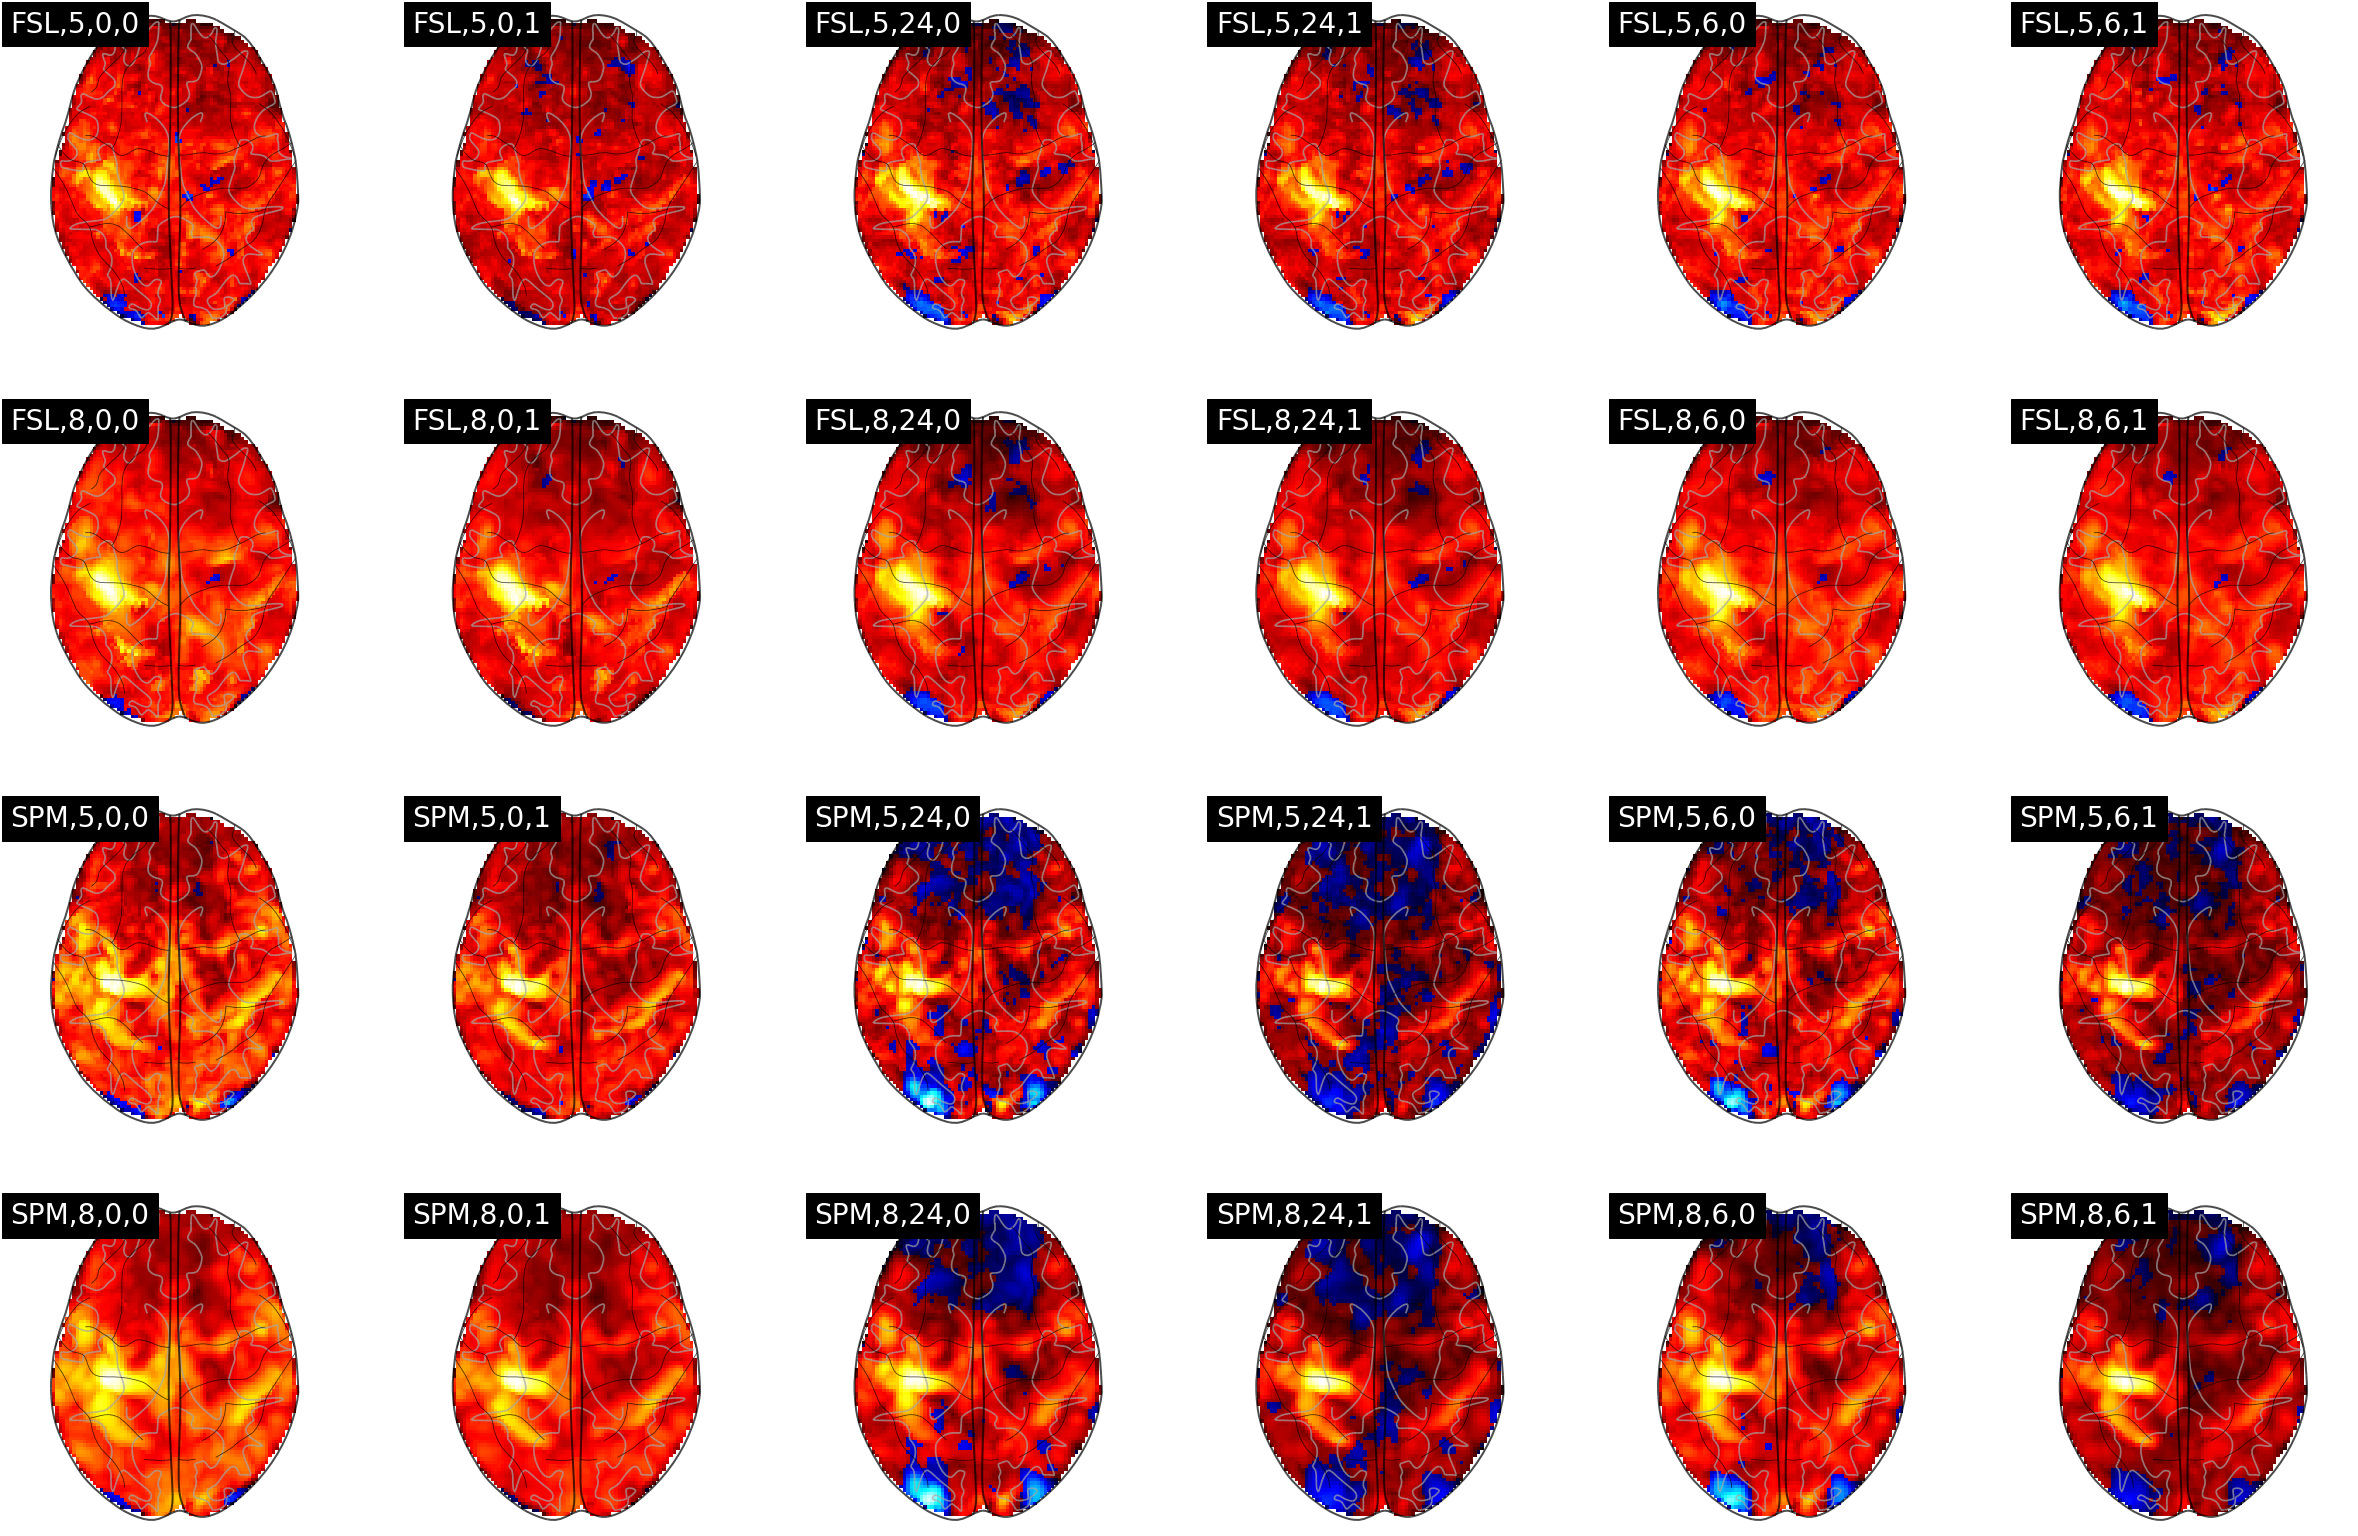

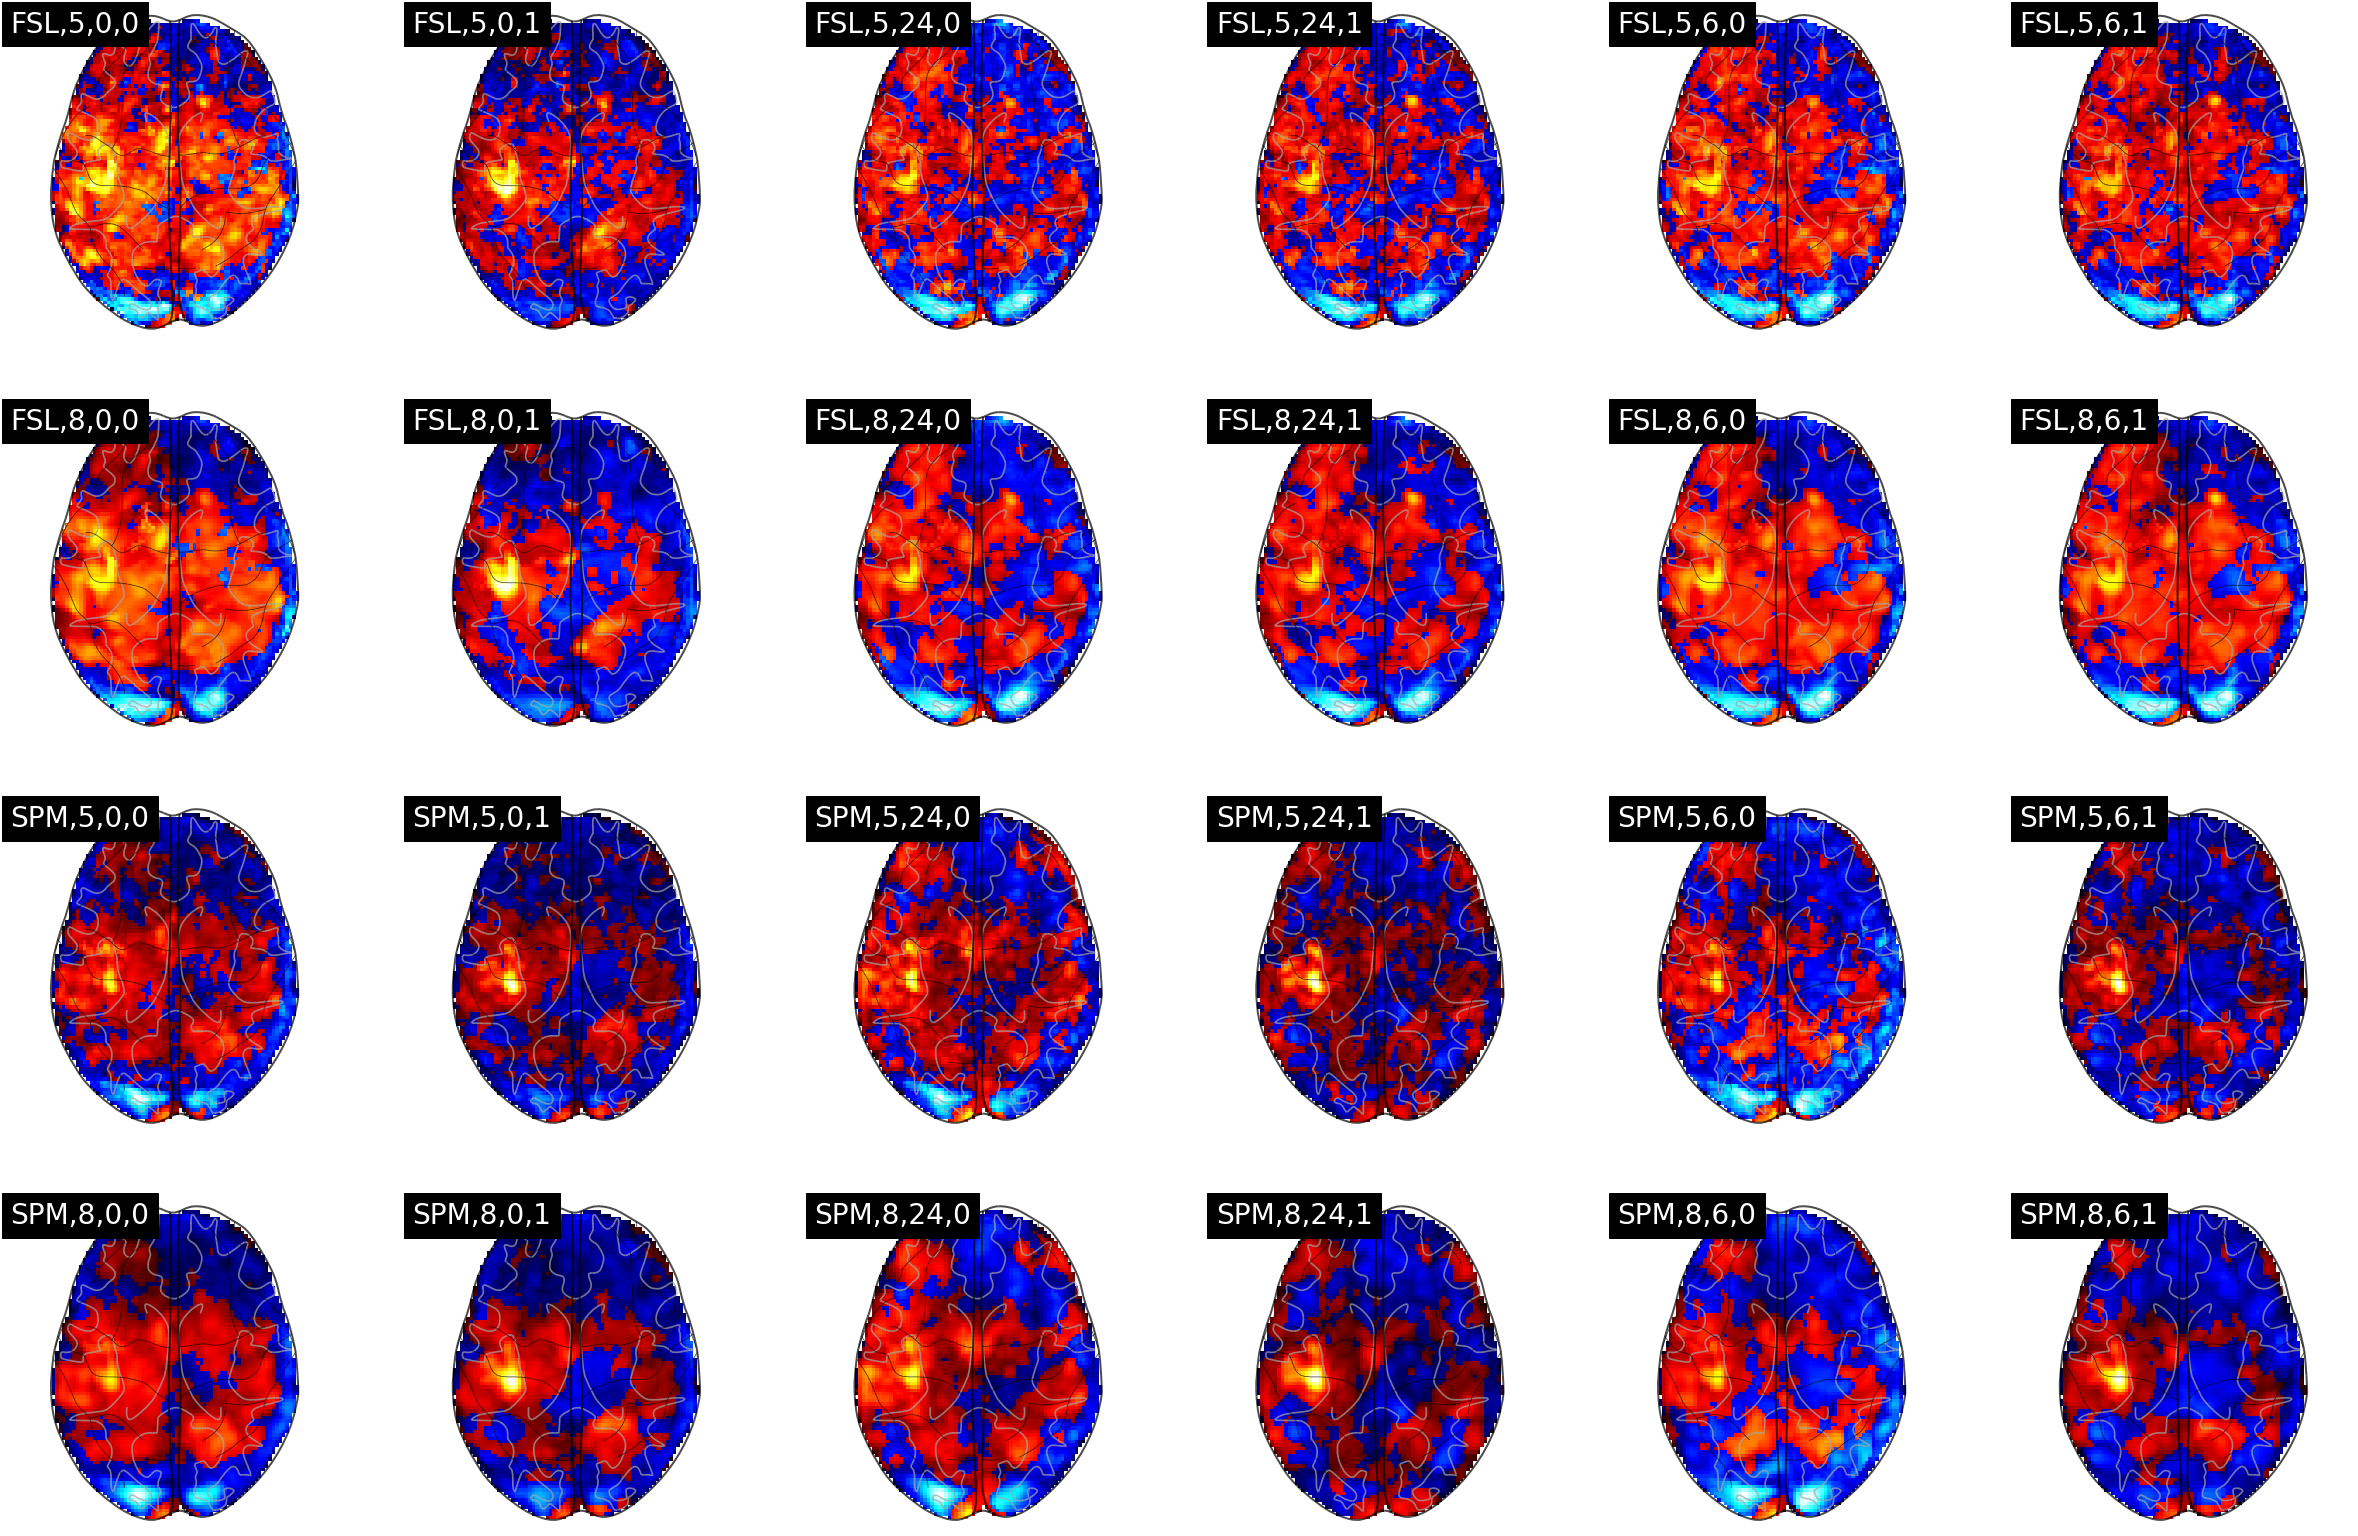

In [9]:
contrast_list=['rh']
map_dir = '/Users/egermani/Documents/hcp_pipelines/data/derived/subject_level/*/original/*'
for subjects in random_subs:
    visualise_maps(subjects, contrast_list, map_dir)

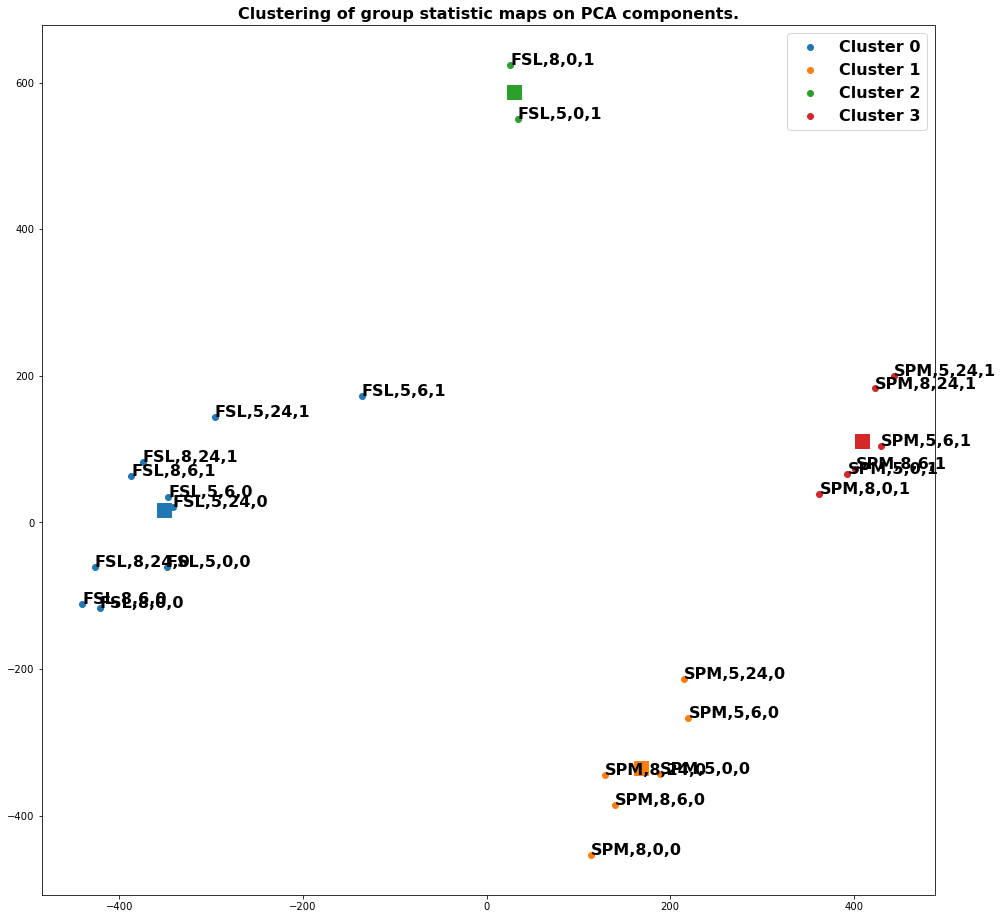

In [17]:
import importlib 
from lib import visual_distances
importlib.reload(visual_distances)
map_dir = '/Volumes/Expansion/hcp_pipelines/data/derived/group_level/group_1/*/original'
pca_2, model_2, maps = visual_distances.plot_group_maps(['rh'], map_dir, plot=False, 
                                              encoder=False, cluster=True, n_cluster=4)

In [10]:
import pandas as pd
pca_dataframe = pd.DataFrame(pca[:, 0:2], columns=['Comp 1', 'Comp 2'])
pca_dataframe['K-means clusters']=model.labels_

In [ ]:
pca2_dataframe = pd.DataFrame(pca_2[:, 0:2], columns=['Comp 1', 'Comp 2'])
pca2_dataframe['K-means clusters']=model_2.labels_

In [16]:
pca_dataframe.groupby(['K-means clusters']).size()

K-means clusters
0    10
1     6
2     2
3     6
dtype: int64

In [18]:
cluster_dict = {'0':[], '1':[], '2':[], '3':[]}

for i, img in enumerate(maps): 
    cluster_dict[str(model_2.labels_[i])].append(img)

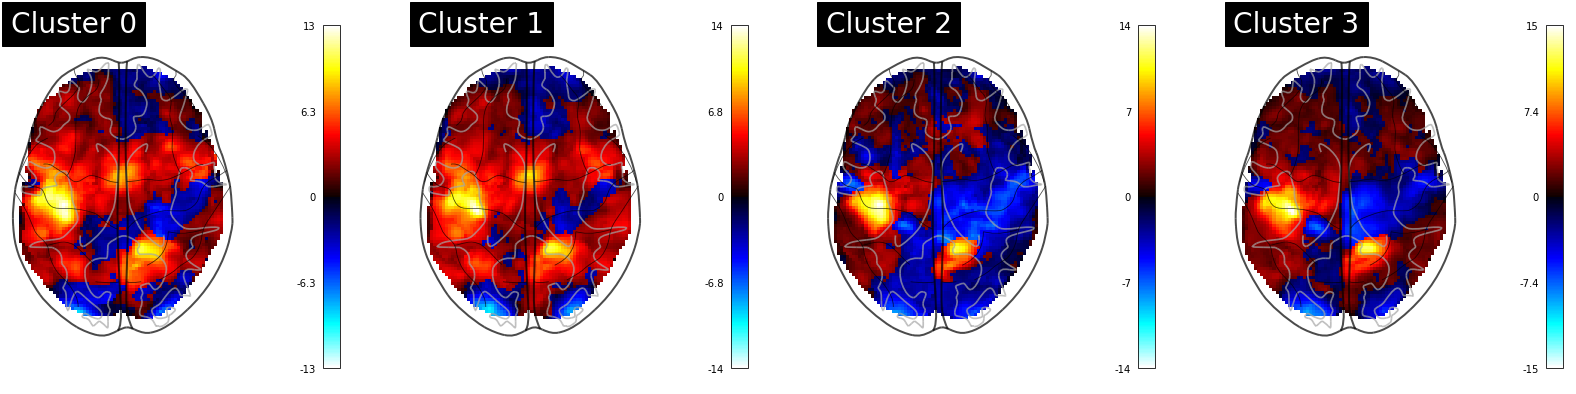

In [20]:
import matplotlib.pyplot as plt
from nilearn import plotting
from glob import glob 
import os
from math import * 
import matplotlib
from nilearn.datasets import load_mni152_template
from nilearn.image import resample_to_img, binarize_img, resample_img
from nilearn.masking import intersect_masks, apply_mask, compute_background_mask
import nibabel as nib
from nilearn import input_data
import numpy as np
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps
from os.path import join as opj

def resample(img, resolution=2):
    template = load_mni152_template(resolution=resolution)
    res_img = resample_to_img(img, template)

    return res_img

def get_intersection_mask(images_list):
    nii_img_list = []
    for img in images_list:
        nii_img_list.append(binarize_img(img, threshold=1e-6))

    mask = intersect_masks(nii_img_list, threshold=1)

    return mask

image_list = []
for file in maps:
    img = nib.load(file)
    res_img = resample(img)
    image_list.append(res_img)

mask = get_intersection_mask(image_list)

masker = input_data.NiftiMasker(
        mask_img=mask)

f = plt.figure(figsize = (7 * 4, 7))
gs = f.add_gridspec(1, 4)

for clusters in cluster_dict.keys():
    data = []
    for img in cluster_dict[clusters]:
        img_data = nib.load(img)
        data.append(img_data)
        
    maskdata = masker.fit_transform(data)
    meandata = np.mean(maskdata, 0)
    mean_img = masker.inverse_transform(meandata)
    
    ax = f.add_subplot(gs[0, int(clusters)])
    
    disp = plotting.plot_glass_brain(mean_img, display_mode = 'z', colorbar = True, annotate=False, 
                                         cmap=nilearn_cmaps['cold_hot'], plot_abs=False, figure=f, axes=ax)
    disp.title(f'Cluster {clusters}', size=28)
plt.show()
f.savefig('../figures/mean_statistic_map_clusters_n1.png')
    

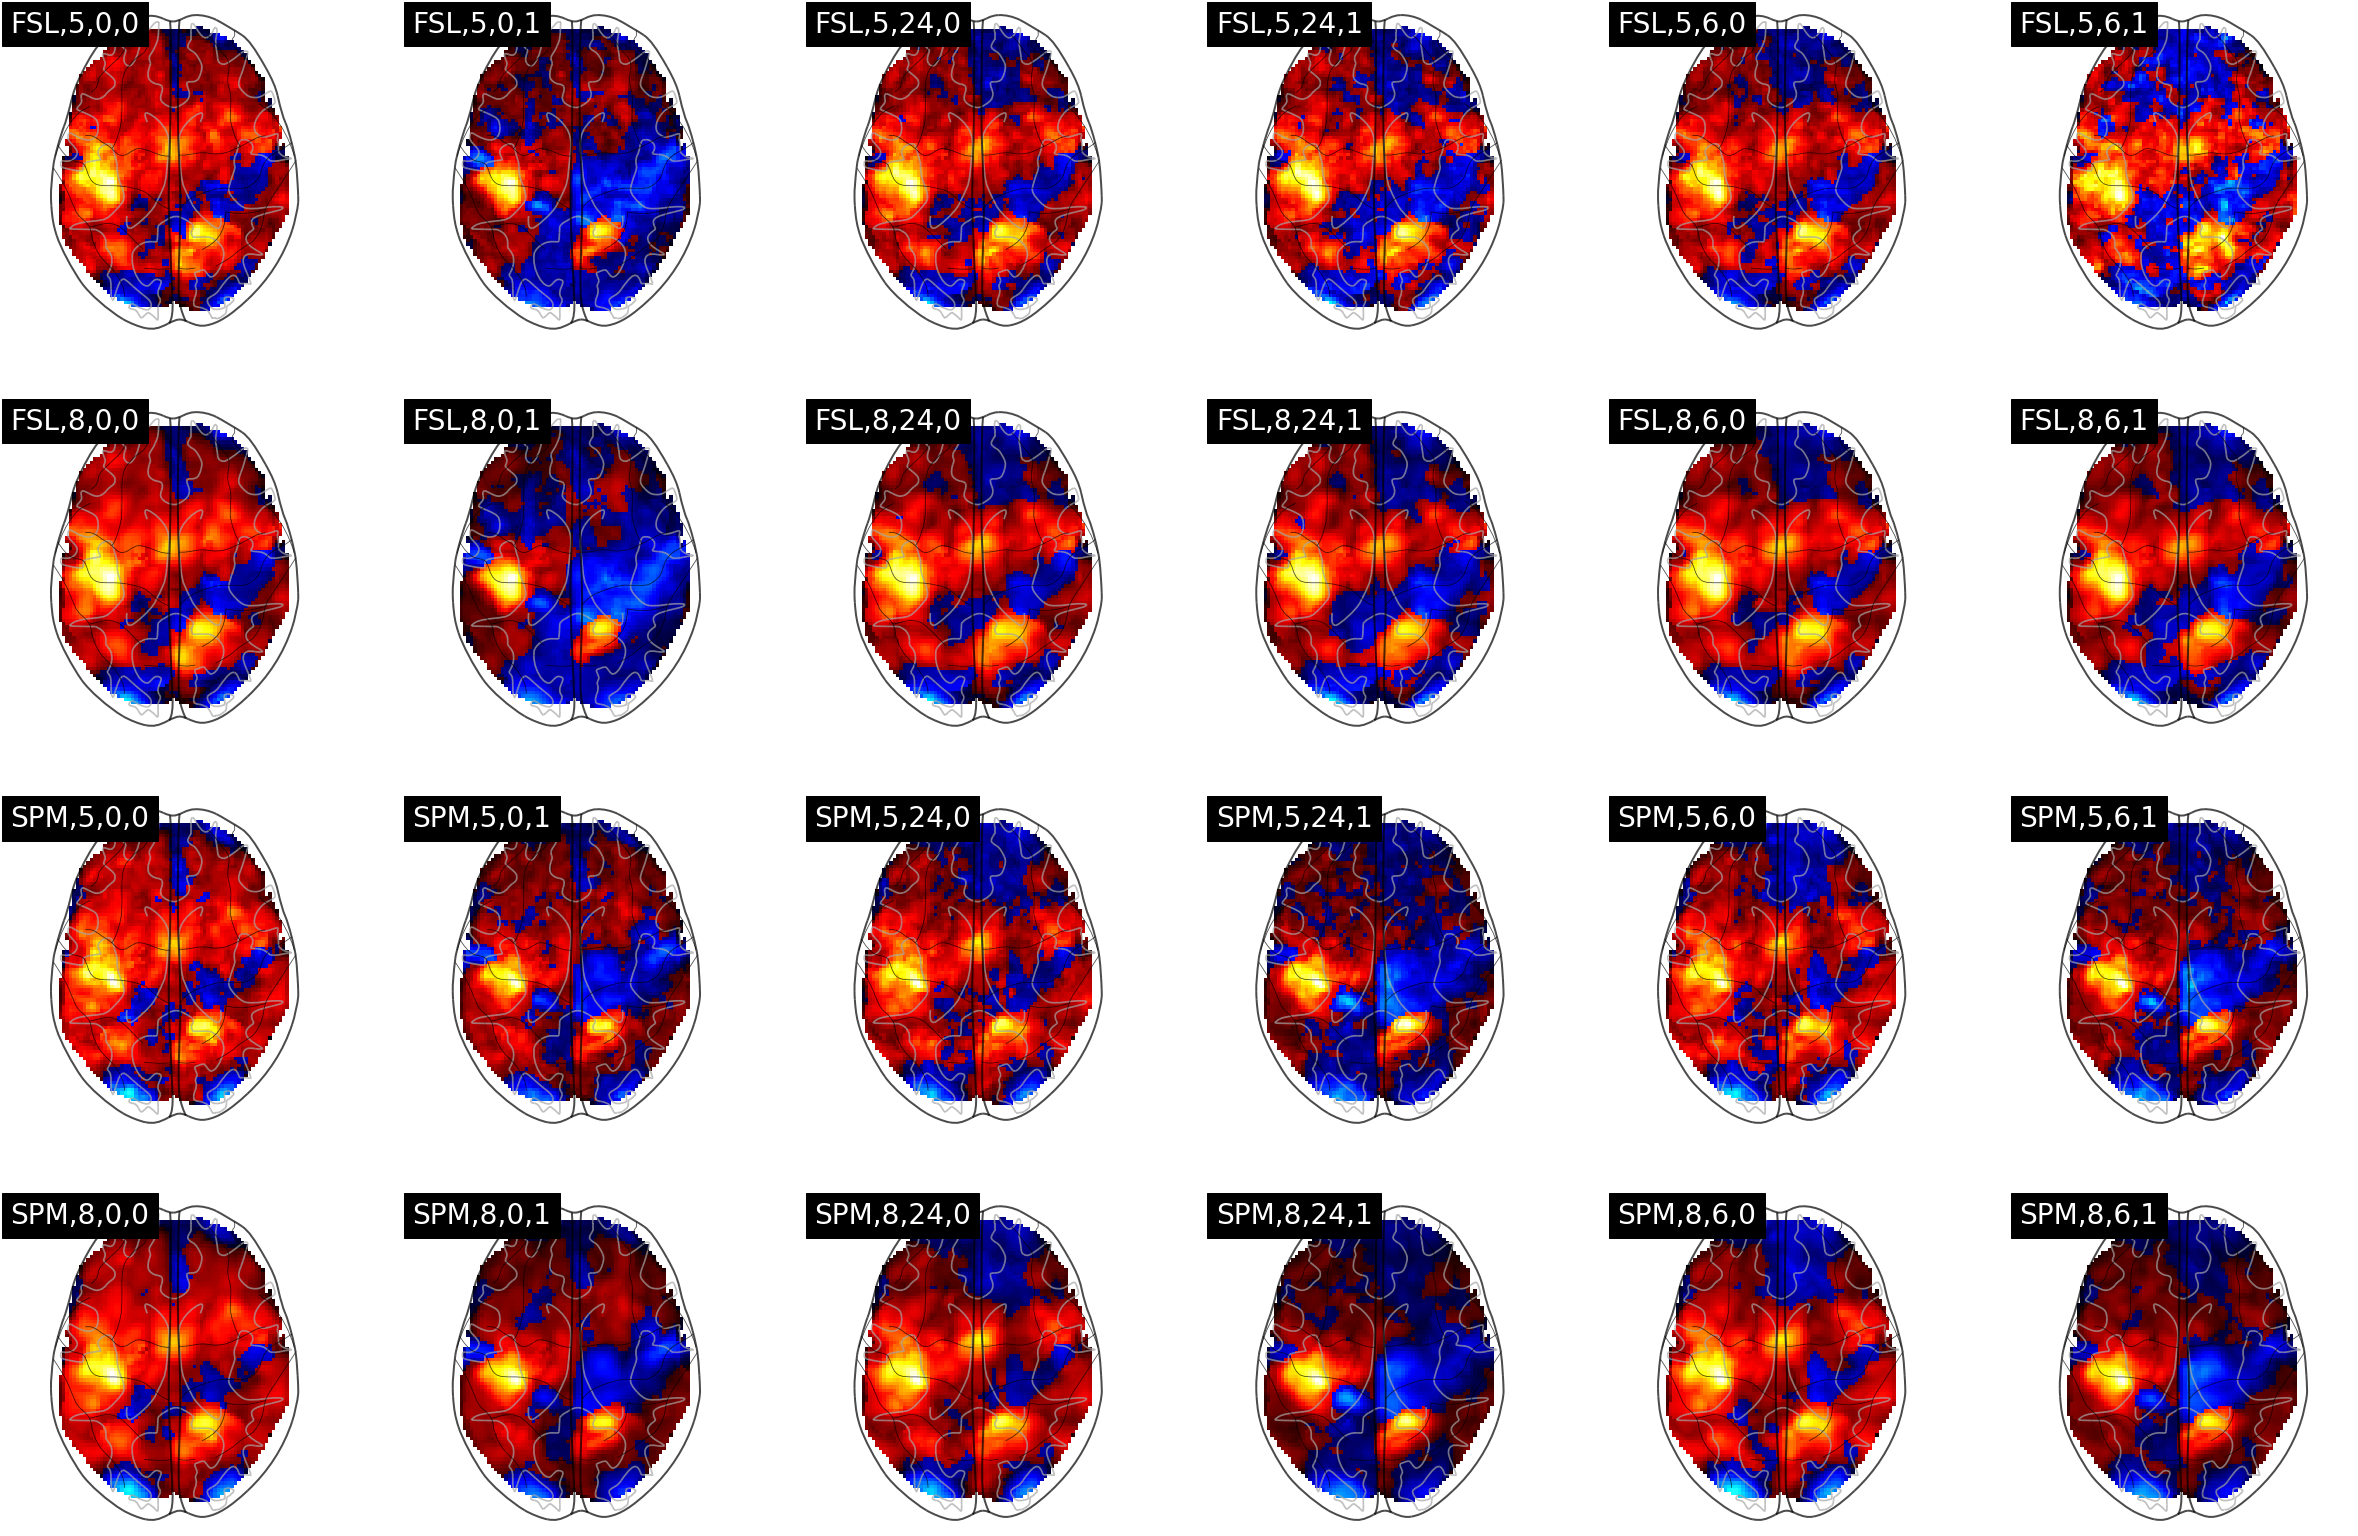

In [28]:
visualise_group_maps(['rh'], map_dir)

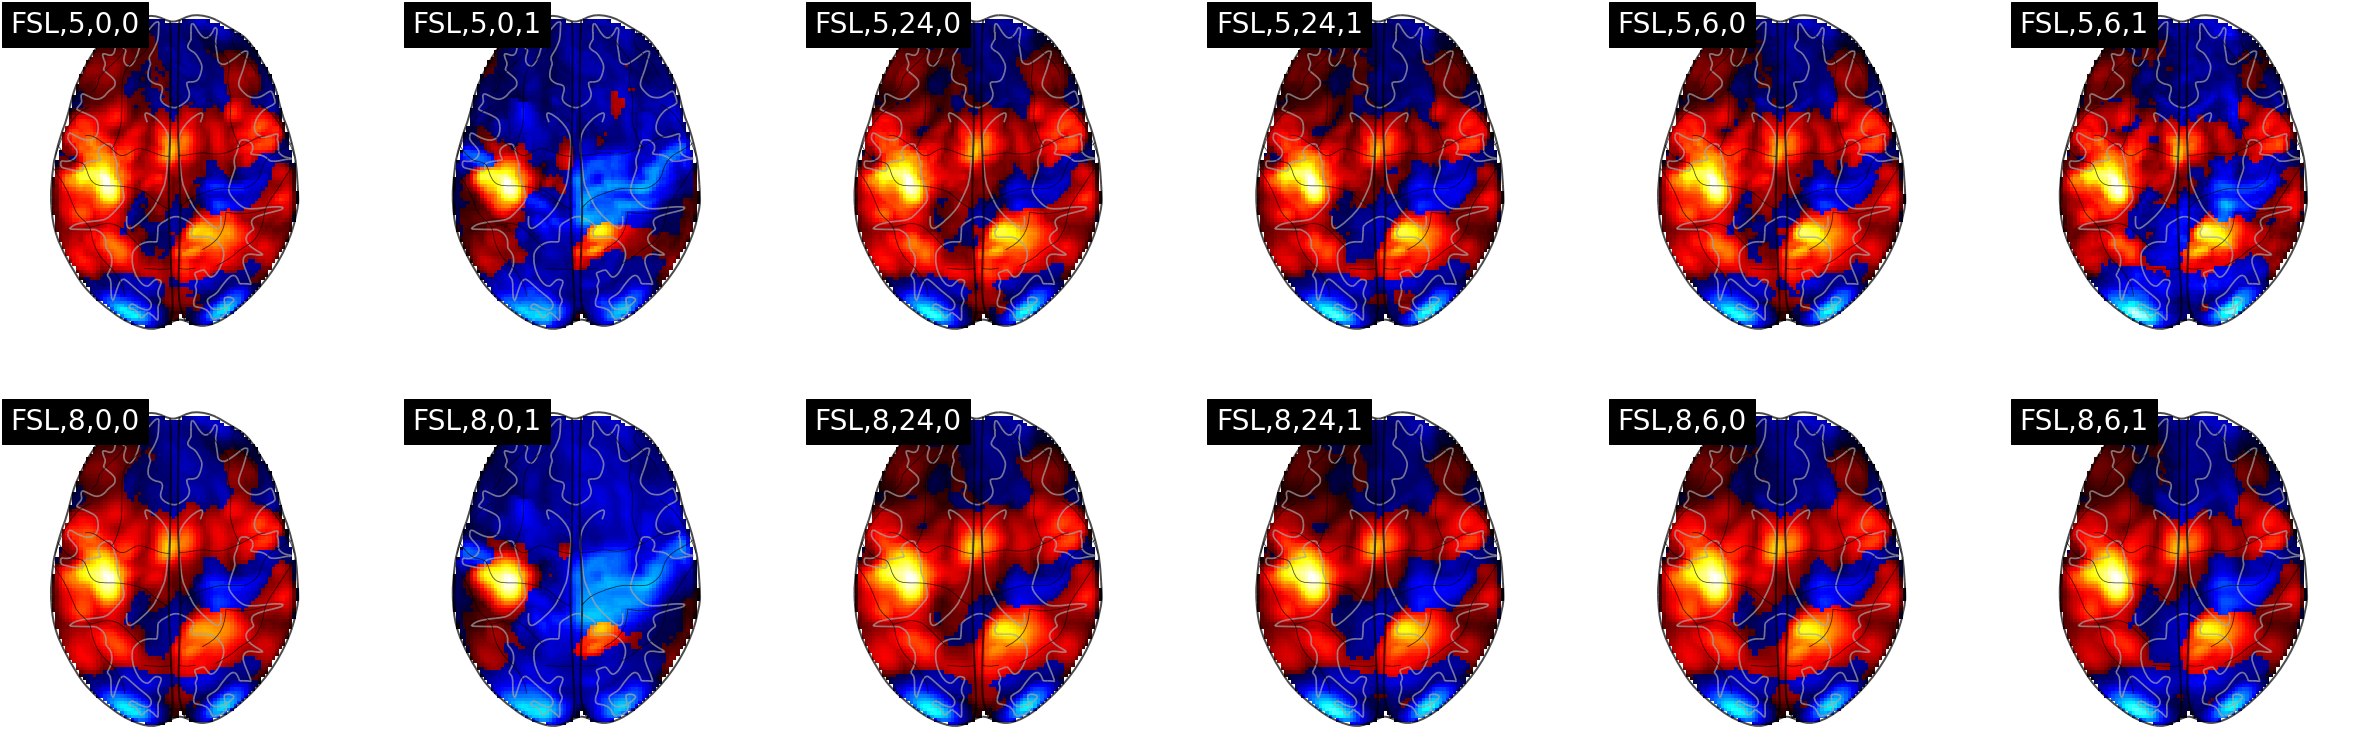

In [8]:
visualise_group_maps(['rh'], map_dir)